In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv("dataset_full/dataset.csv")

In [33]:
import pandas as pd

def assign_labels_for_sub_mission(df, sub_mission_labels=["Combat", "Exercise", "Sortie", "Humanitarian", "Fleet", "Support"]):
    condition1 = (df['Category'] == "Mission")
    condition2 = (df['Category'] == "Maintenance")

    values_to_assign = sub_mission_labels

    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    df = df.copy()

    # Get the indices of rows that meet the condition
    indices = df[condition1].index

    # Calculate the number of rows that should receive each value
    num_values = len(values_to_assign)
    num_rows = len(indices)
    rows_per_value = num_rows // num_values

    # Create a list of values to assign in the correct order
    assigned_values = (values_to_assign * (rows_per_value + 1))[:num_rows]

    # Assign the values to the rows using .loc
    df.loc[indices, 'Sub - mission'] = assigned_values

    # Assign "Not Applicable" to rows where condition2 is True using .loc
    df.loc[condition2, 'Sub - mission'] = "Not Applicable"

    return df


In [34]:
df = assign_labels_for_sub_mission(df)

df['Sub - mission'].value_counts()

Sub - mission
Not Applicable    1380
Combat             230
Exercise           230
Sortie             230
Humanitarian       230
Fleet              230
Support            230
Name: count, dtype: int64

In [7]:
print(list(df.columns)[1:])

['Category', 'Sub - mission', 'Level', 'Action', 'Entity', 'From', 'Time', 'Location', 'Task Objective', 'Objective function', 'Hard Constrains', 'Soft Constrains (Preferences)']


In [8]:
df['Level'].value_counts()

Level
Fleet        920
Ship         920
Equipment    920
Name: count, dtype: int64

In [15]:
def create_count_plots(columns_to_plot, df):
    # List of columns to plot

    if isinstance(columns_to_plot,str):
        columns_to_plot = [columns_to_plot]

    fig_type = len(columns_to_plot)
    # Set up the matplotlib figure with subplots

    n_rows = int(np.ceil(len(columns_to_plot)/3))

    if fig_type == 1:
        fig, axs = plt.subplots(n_rows, 1, figsize=(10, 6 * n_rows))
        axs = [axs]
    else:
        fig, axs = plt.subplots(n_rows, 3, figsize=(24, 6 * n_rows))
        axs = axs.flatten()[:fig_type]

    # Create a bar plot for each column using seaborn
    for idx, column in enumerate(columns_to_plot):
        sns.countplot(x=column, data=df, palette='viridis', hue=column, dodge=False, legend=False, ax=axs[idx])
        
        # Add titles and labels
        axs[idx].set_title(f'Distribution of {column}', fontsize=16)

        axs[idx].set_xlabel(column, fontsize=14)
        axs[idx].set_ylabel('Count', fontsize=14)
        
        # Add count labels on top of the bars
        level_counts = df[column].value_counts()

        for i in range(len(level_counts)):
            
            axs[idx].text(i, level_counts.values[i] + 1, str(level_counts.values[i]), ha='center', fontsize=12)
        
    
        # axs[idx].tick_params('x',direction='out', length=6, width=2, colors='r',
        #        grid_color='r', grid_alpha=0.5)
        
        # labels = list(map(add_newline, list(level_counts.index)))
        # axs[idx].set_xticklabels(labels, ha='right', fontsize=10)


        # Improve the layout
        plt.tight_layout()

    # Show the plot
    plt.show()

In [16]:
columns_to_plot = df.columns

In [17]:
columns_to_plot[1]

'Category'

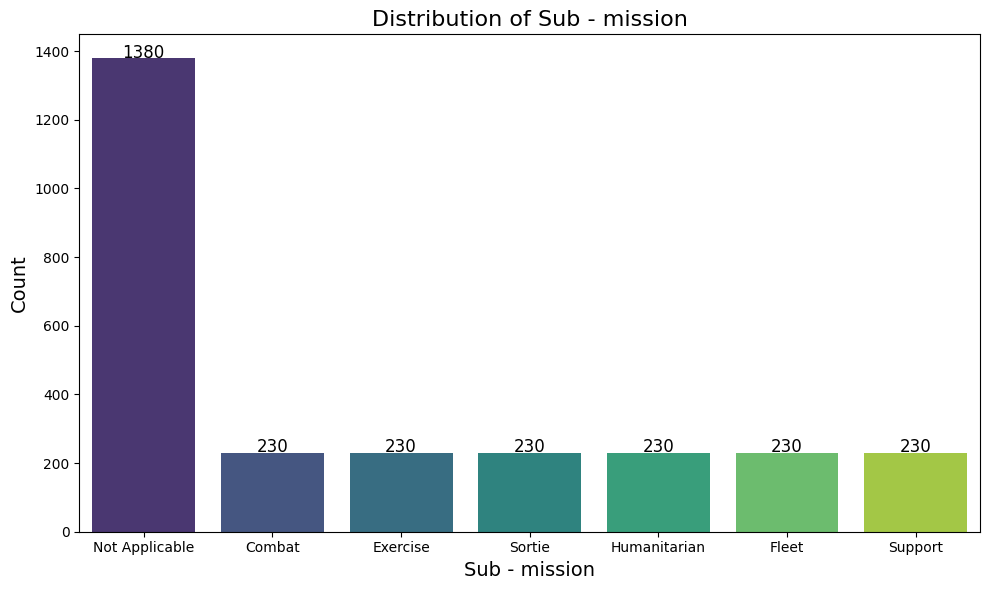

In [18]:
create_count_plots(columns_to_plot[2], df)

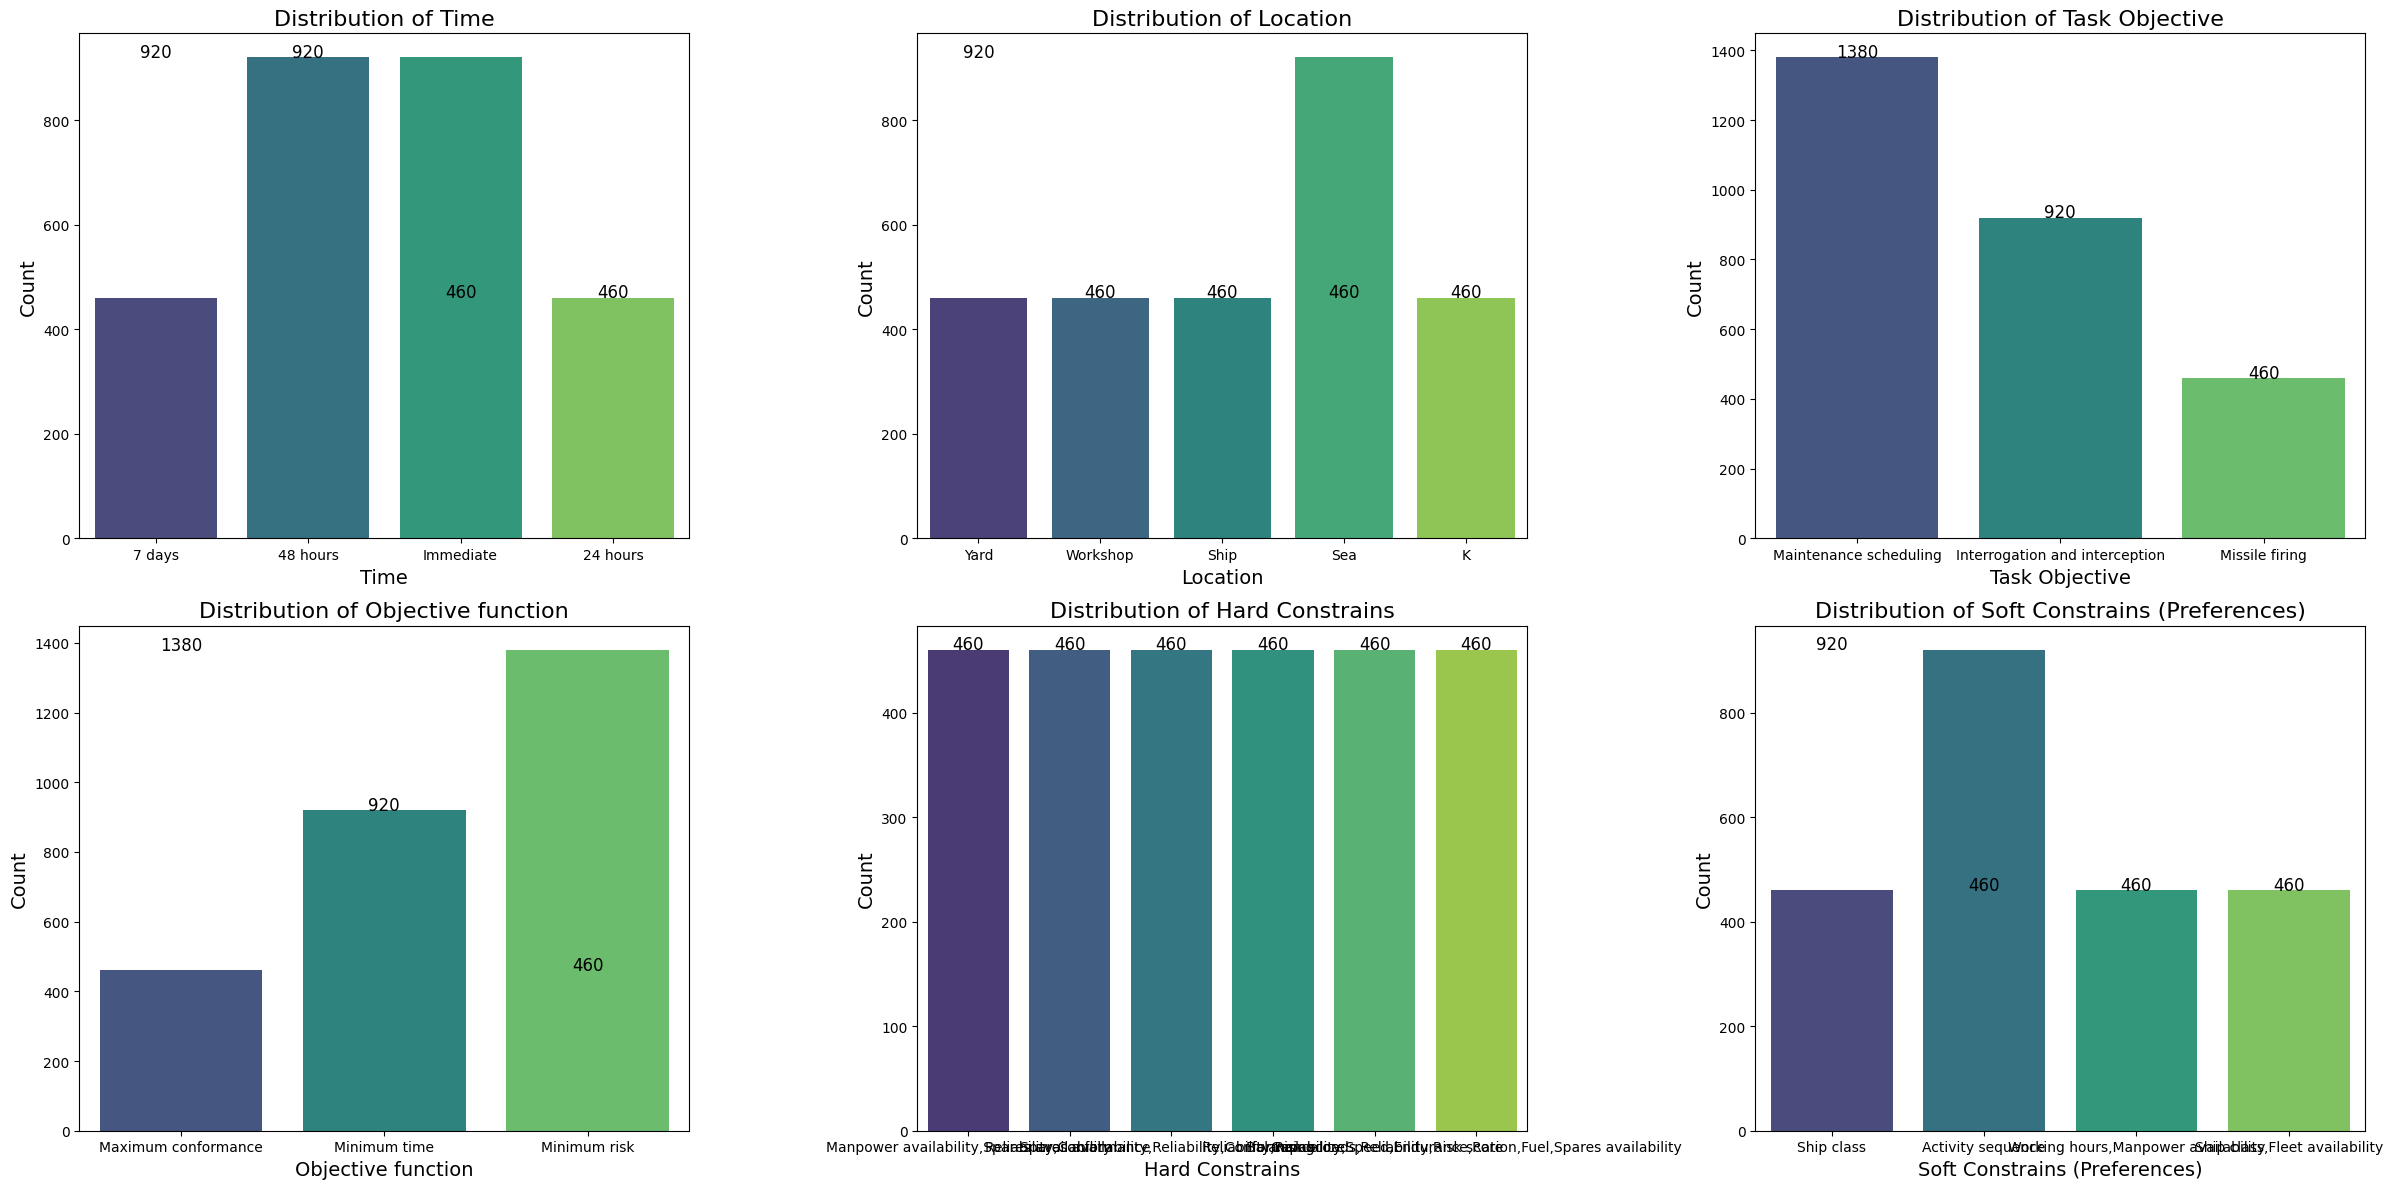

In [ ]:
create_count_plots(columns_to_plot[7:], df)

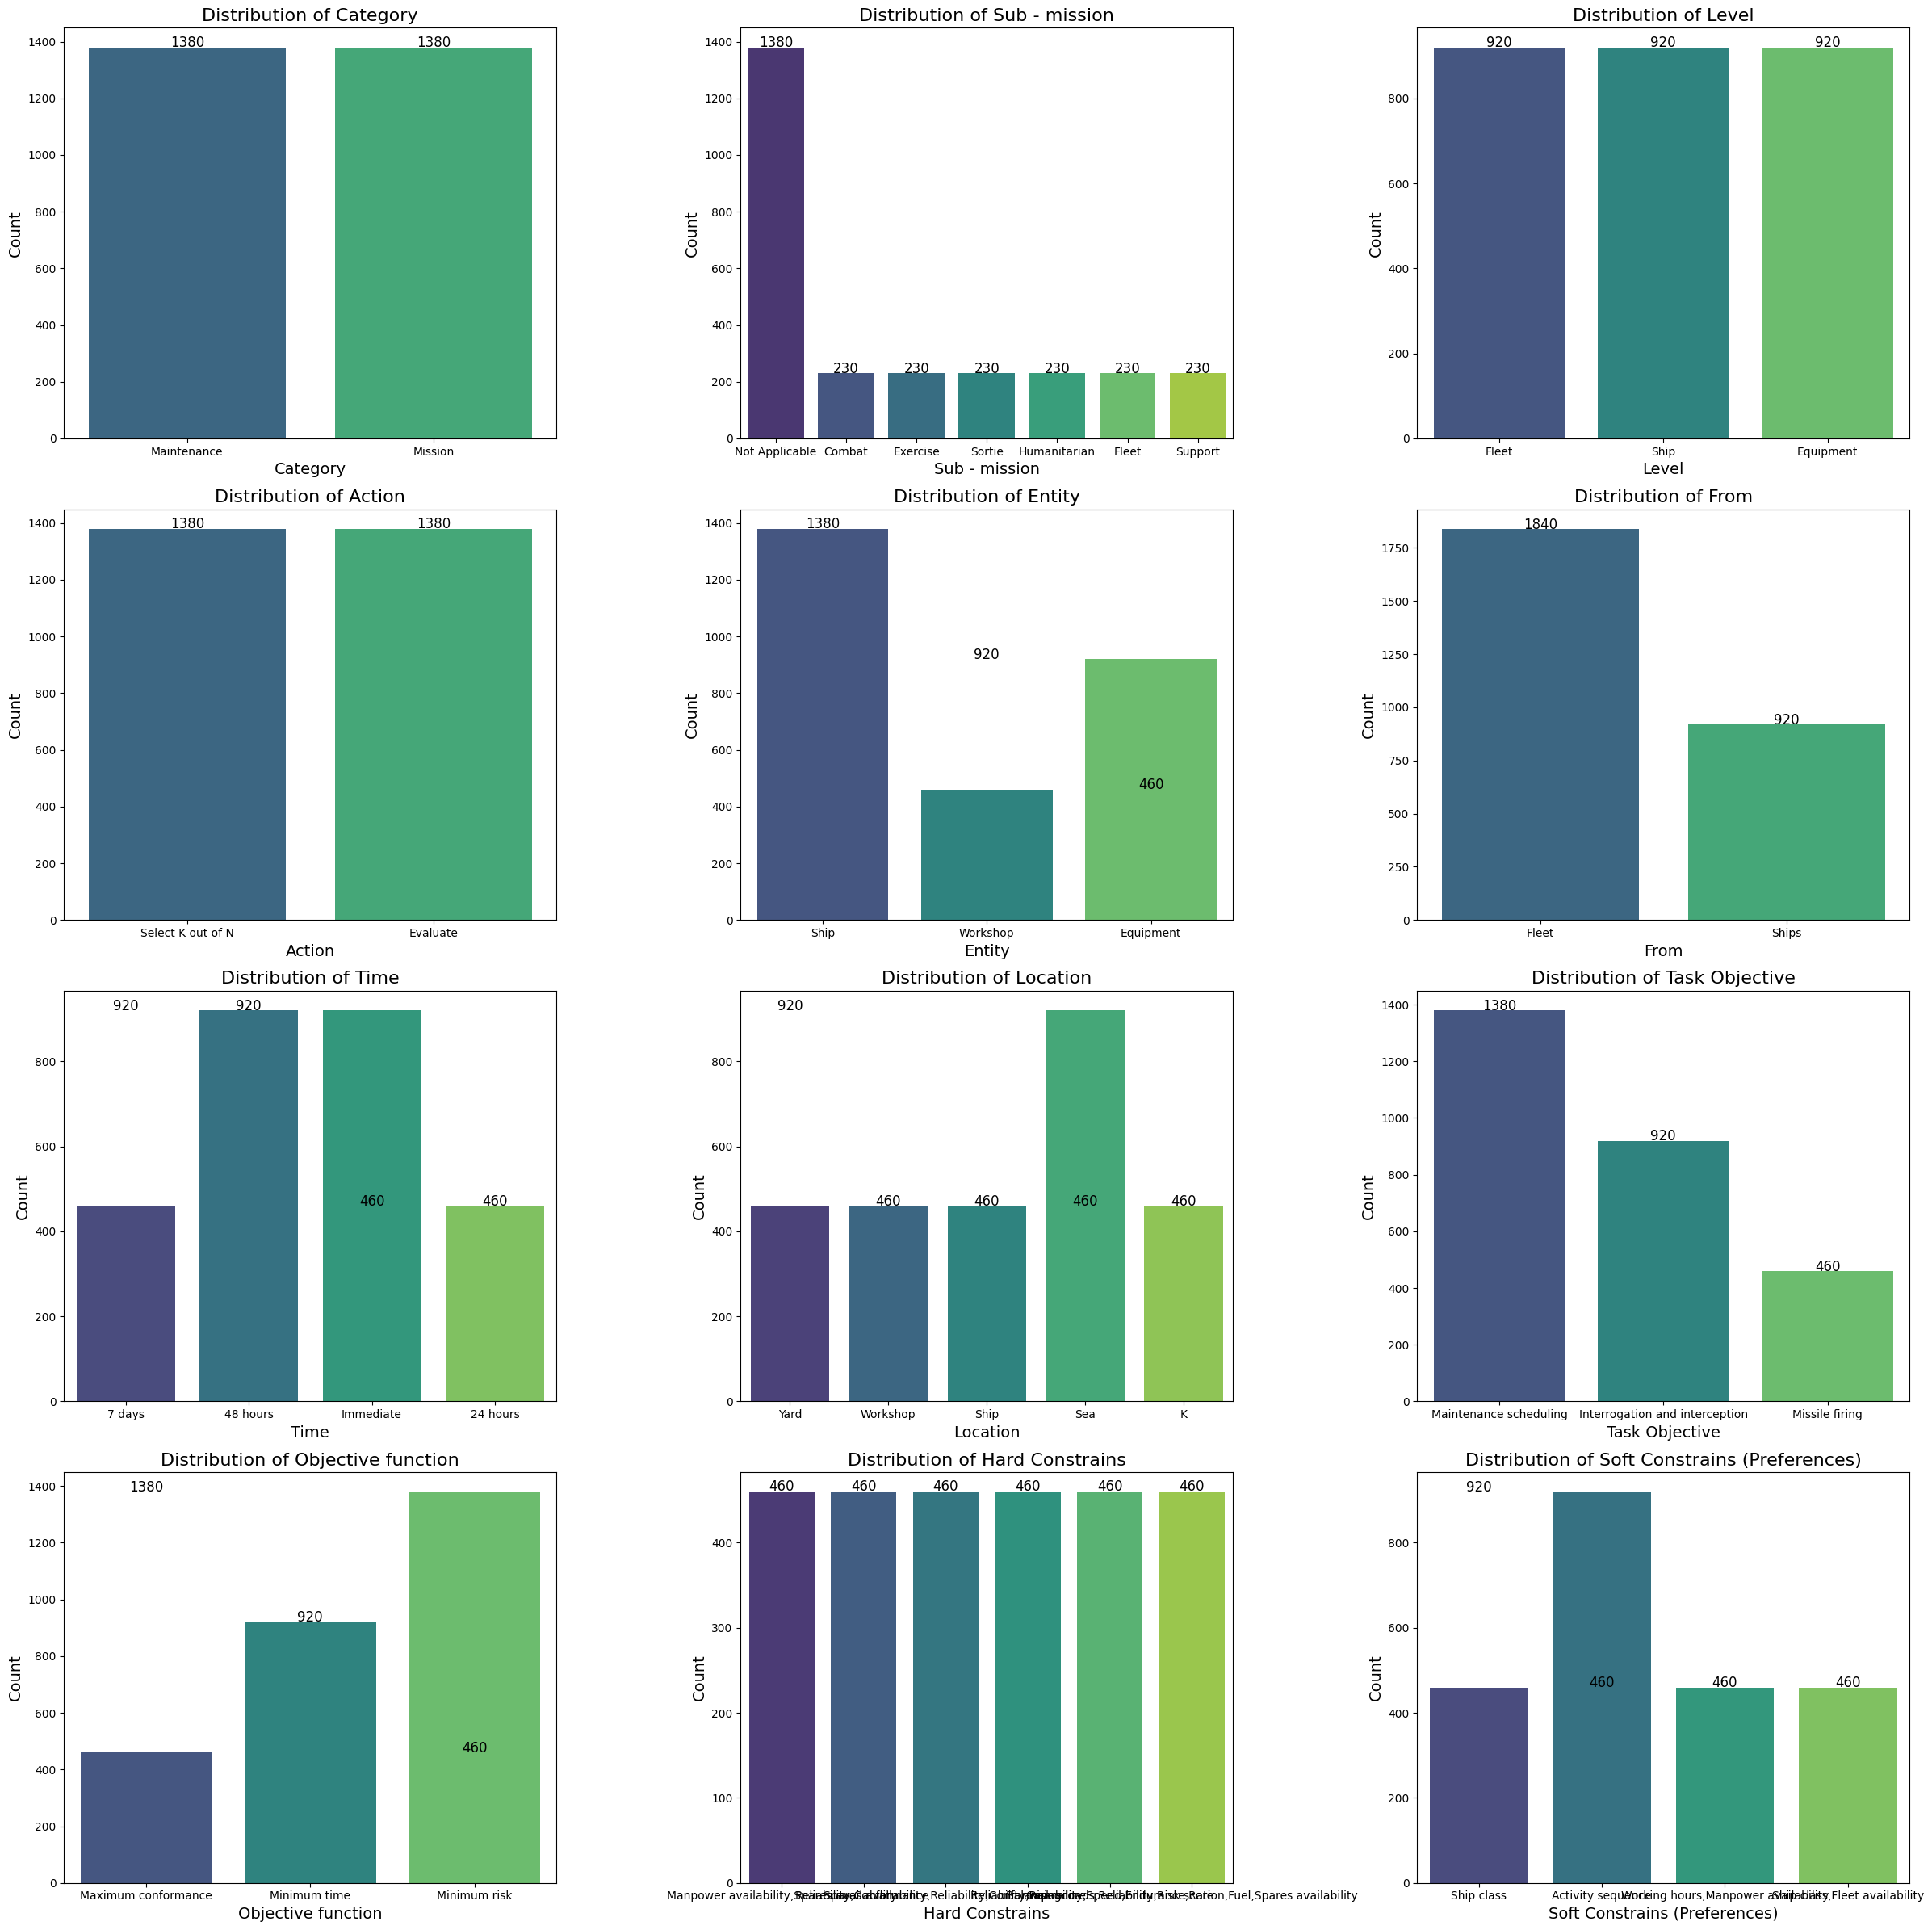

In [ ]:
create_count_plots(columns_to_plot[1:], df)

In [15]:
from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)


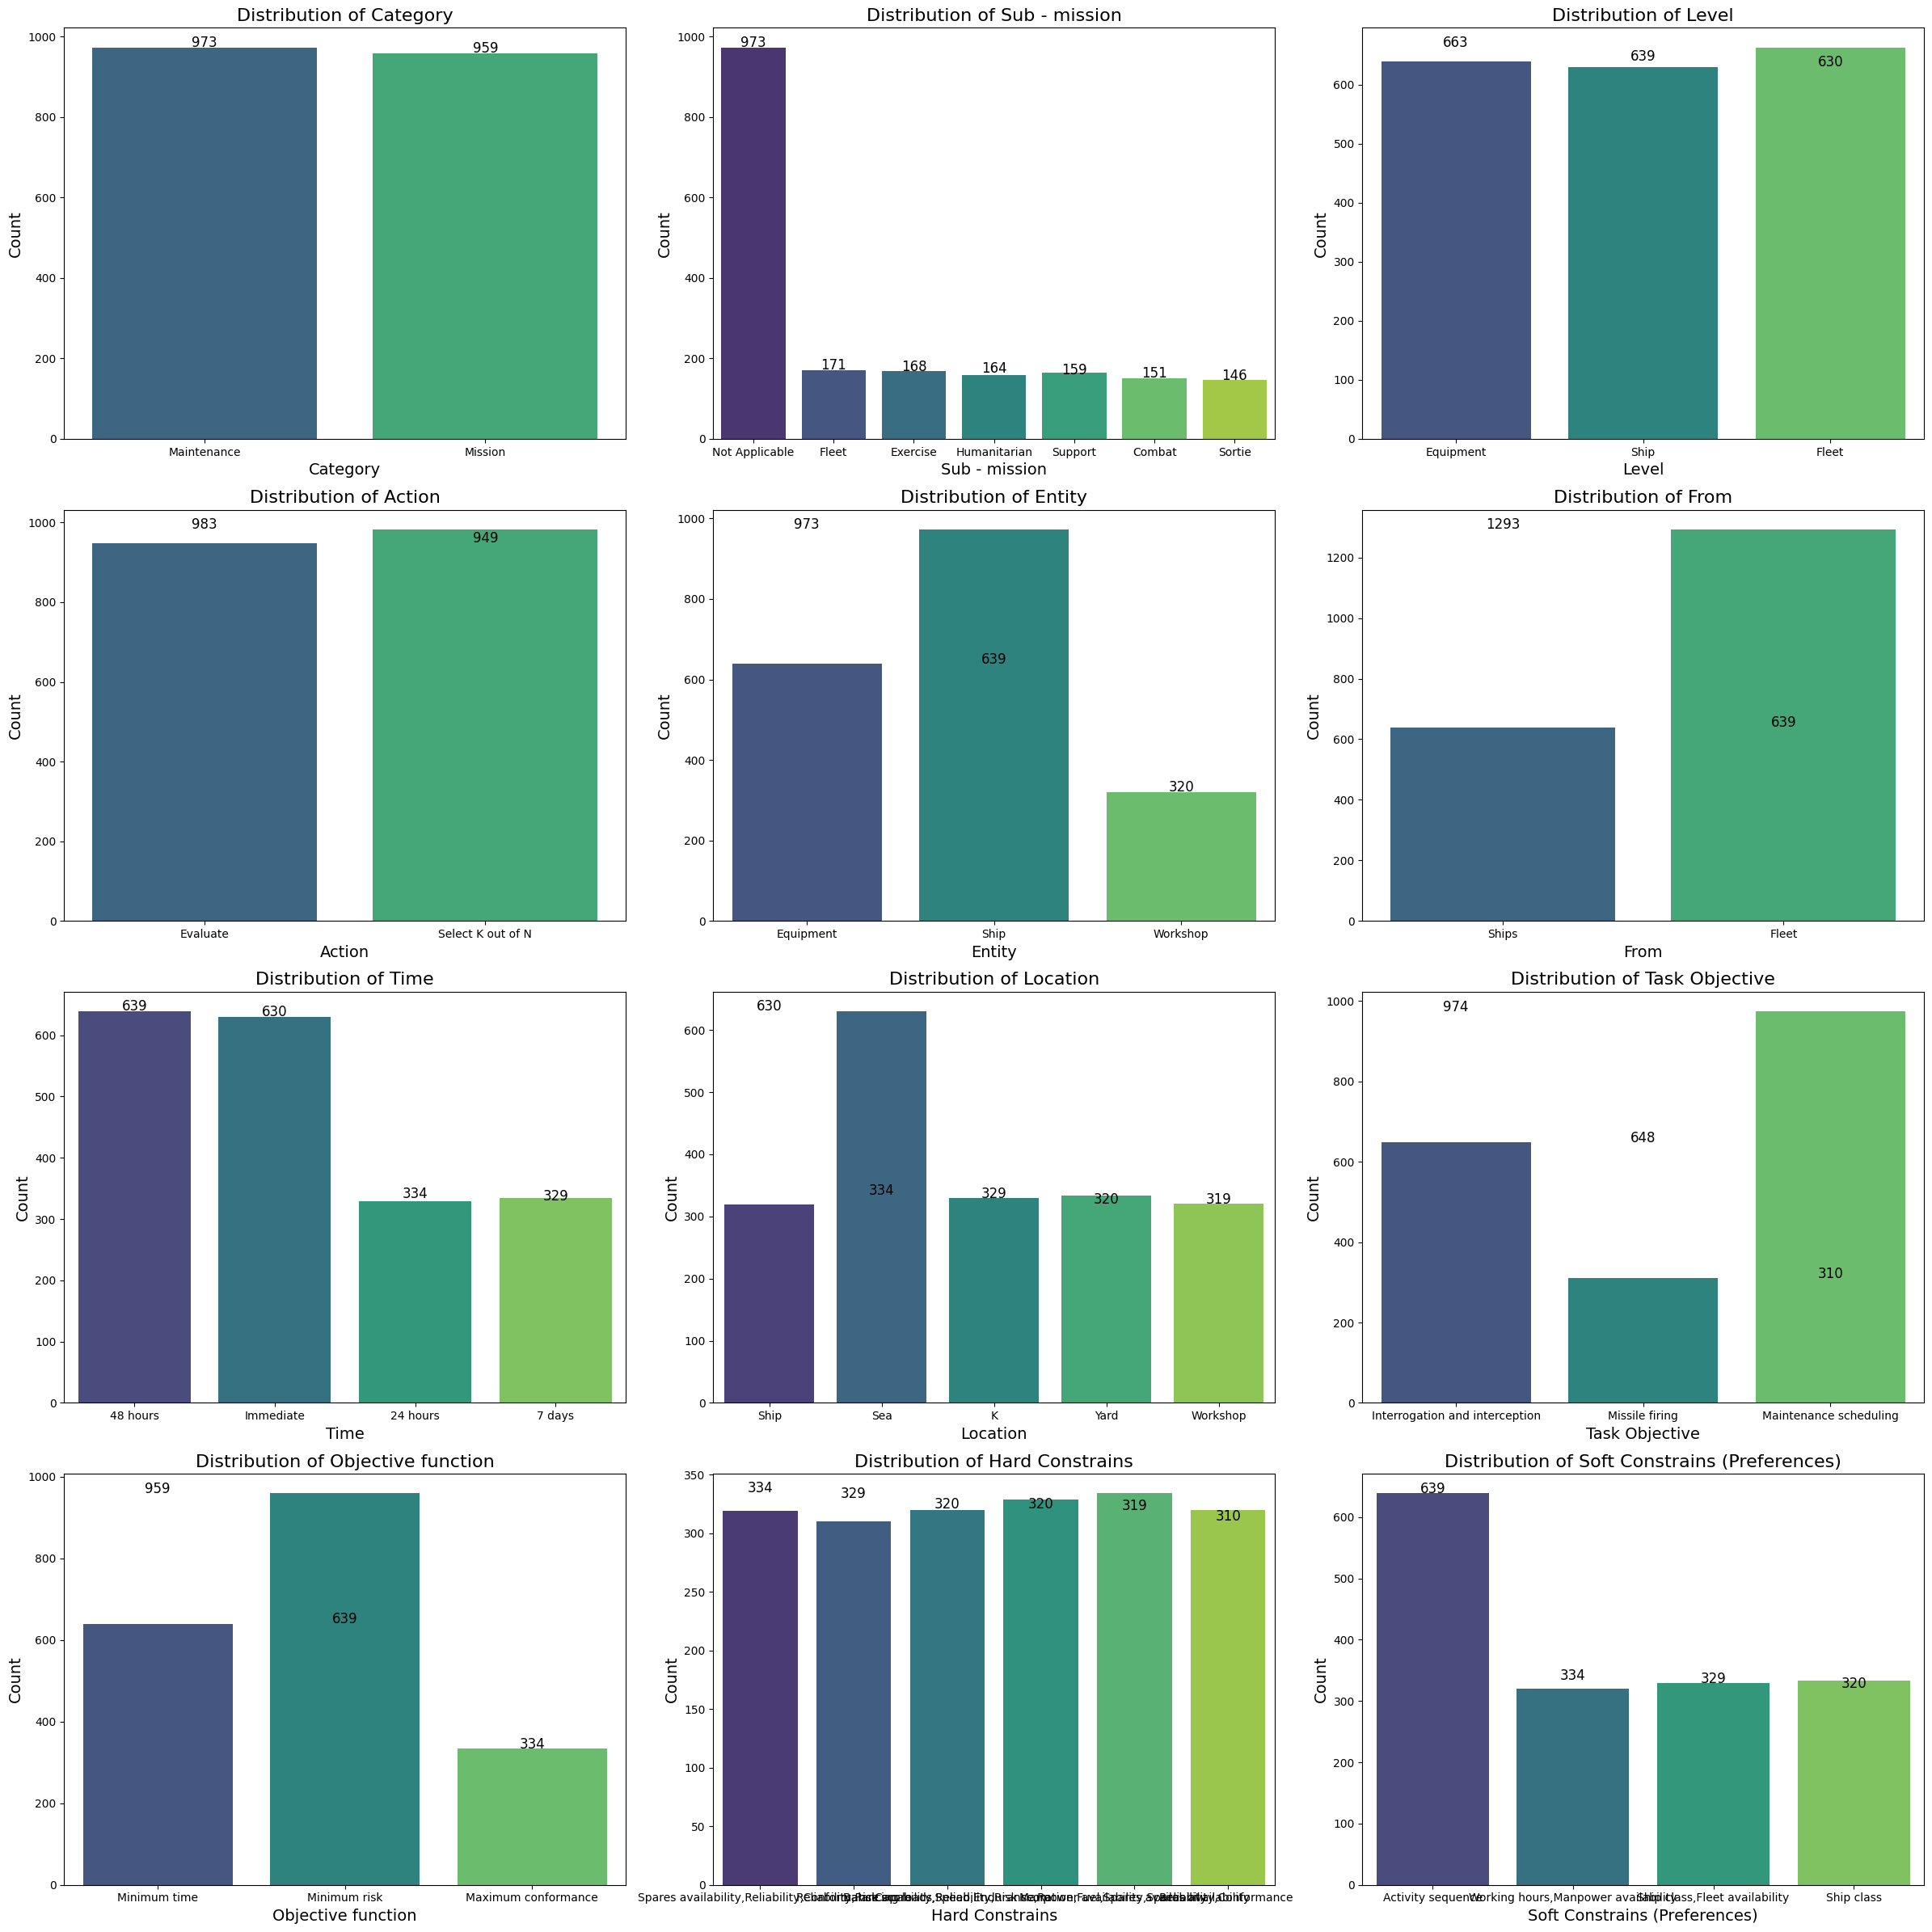

In [16]:
create_count_plots(columns_to_plot[1:], df_train)

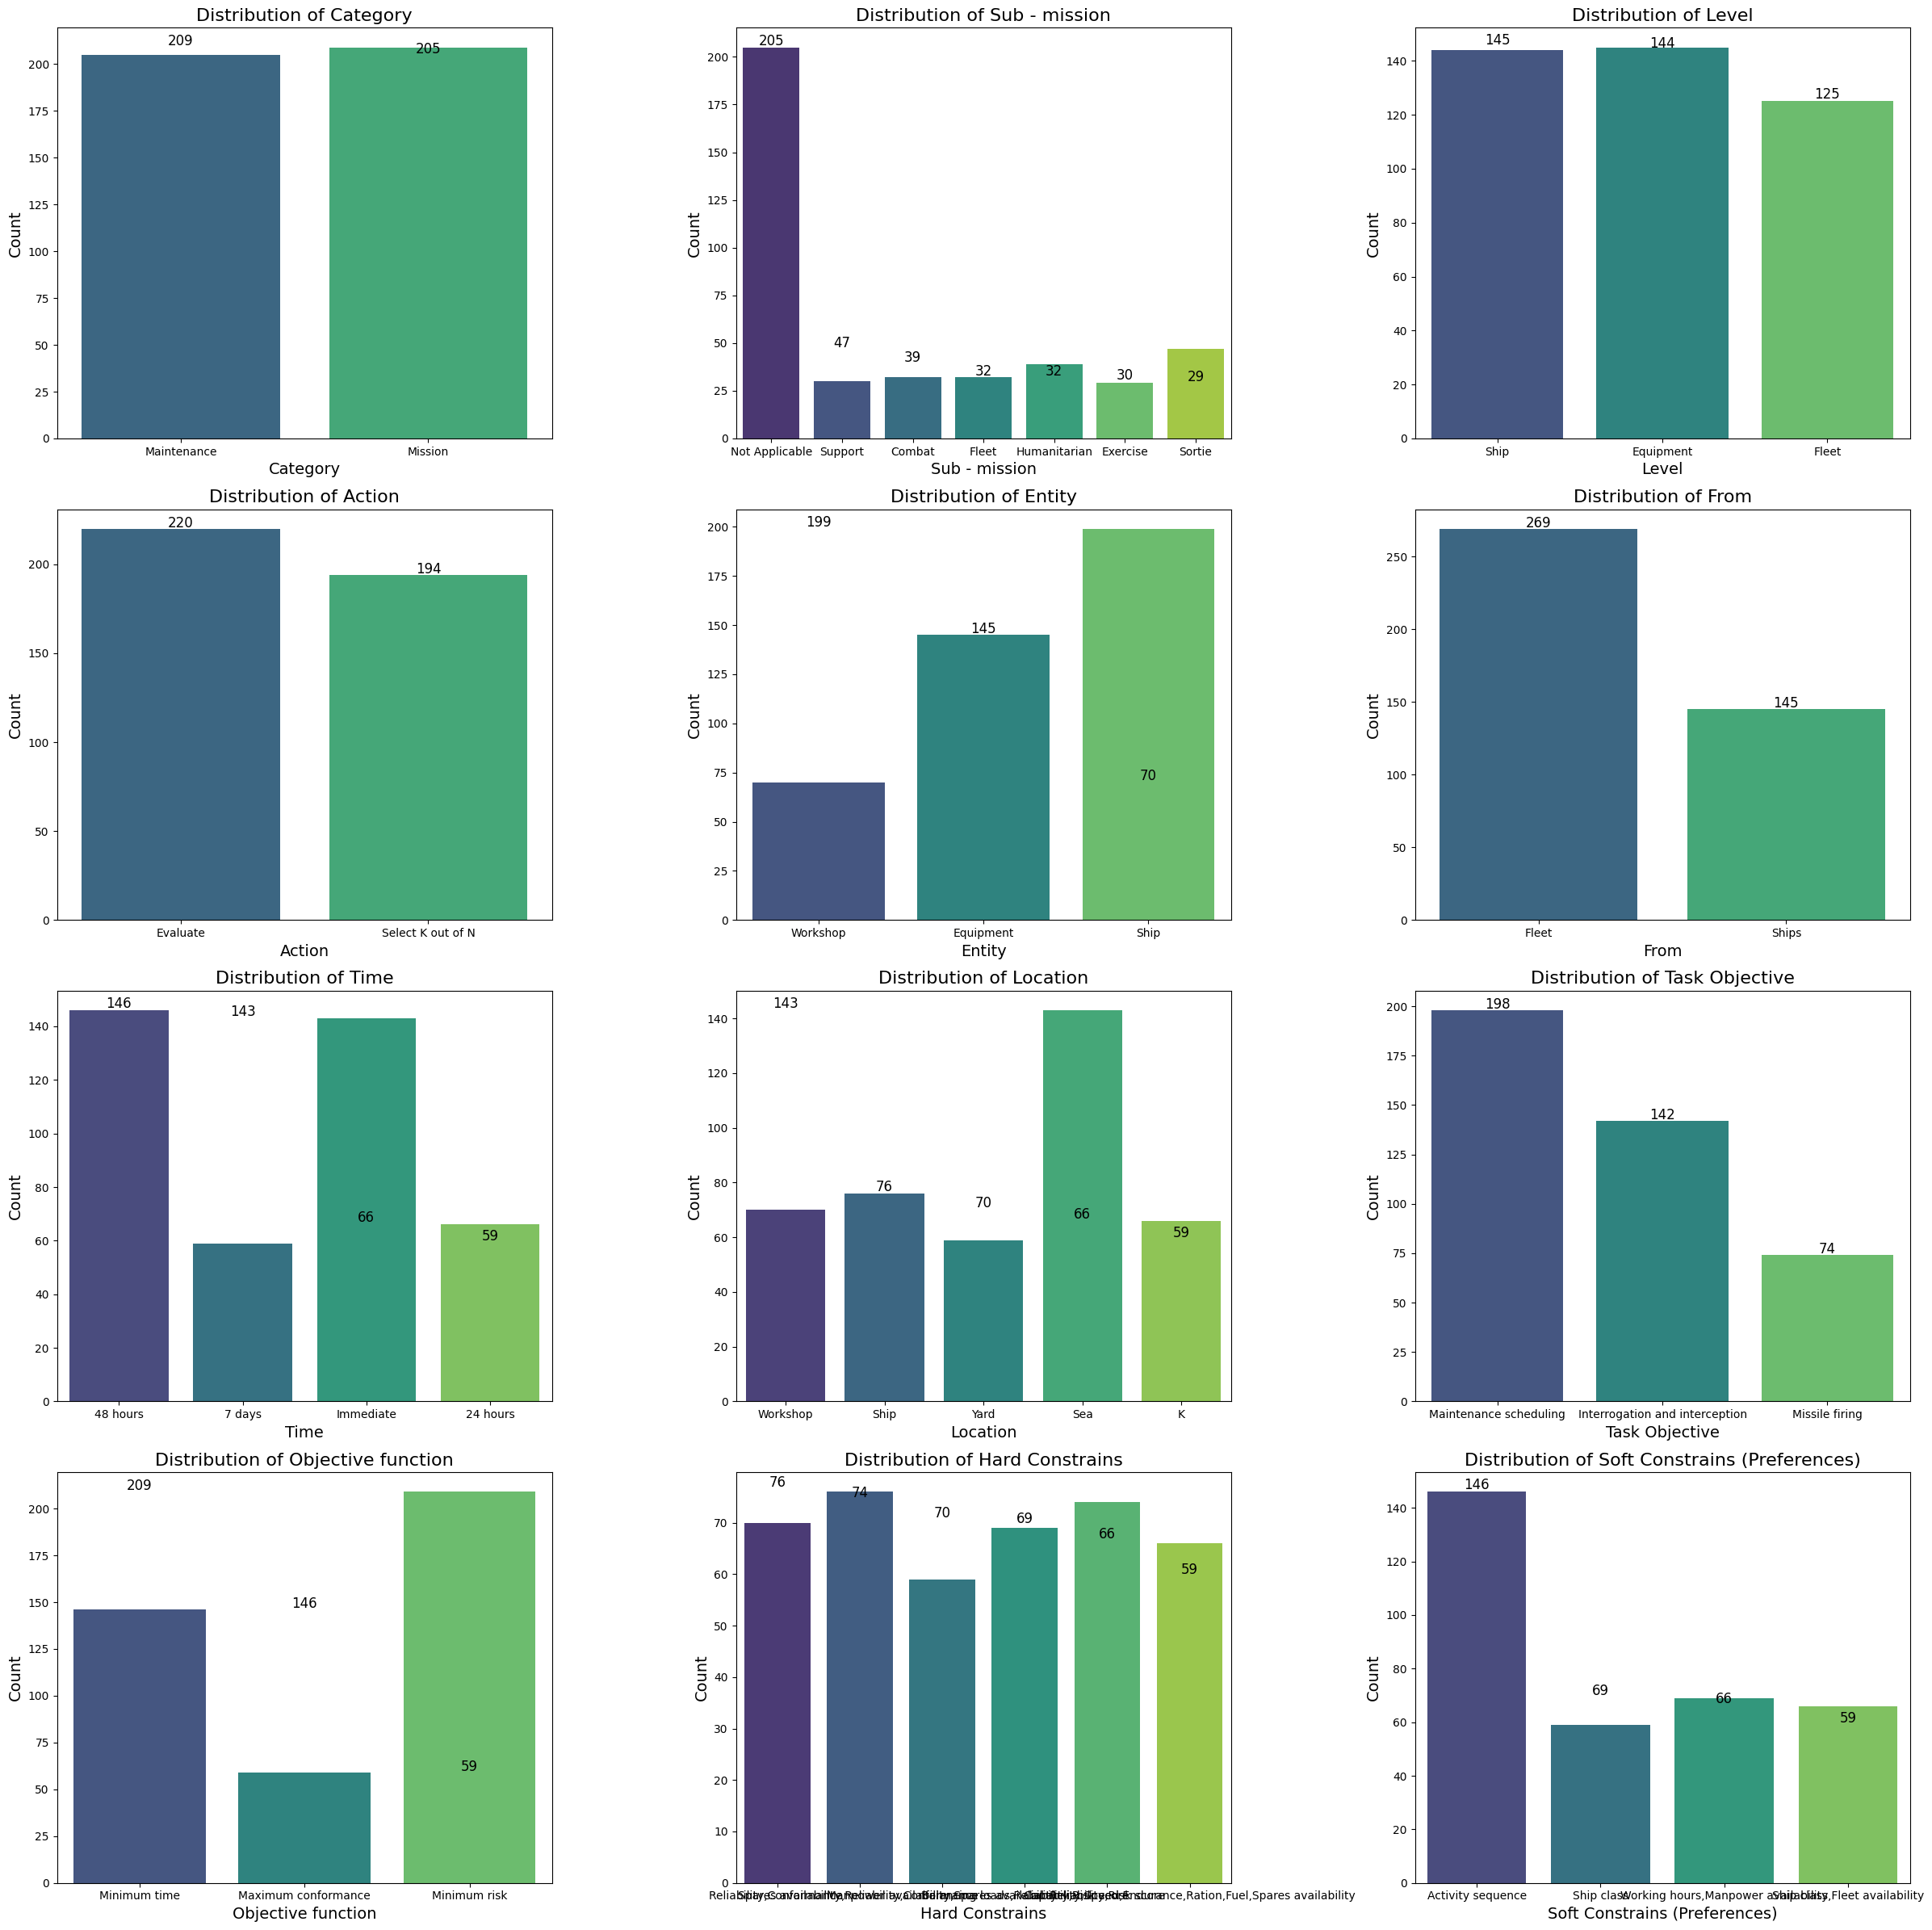

In [19]:
create_count_plots(columns_to_plot[1:], df_val)

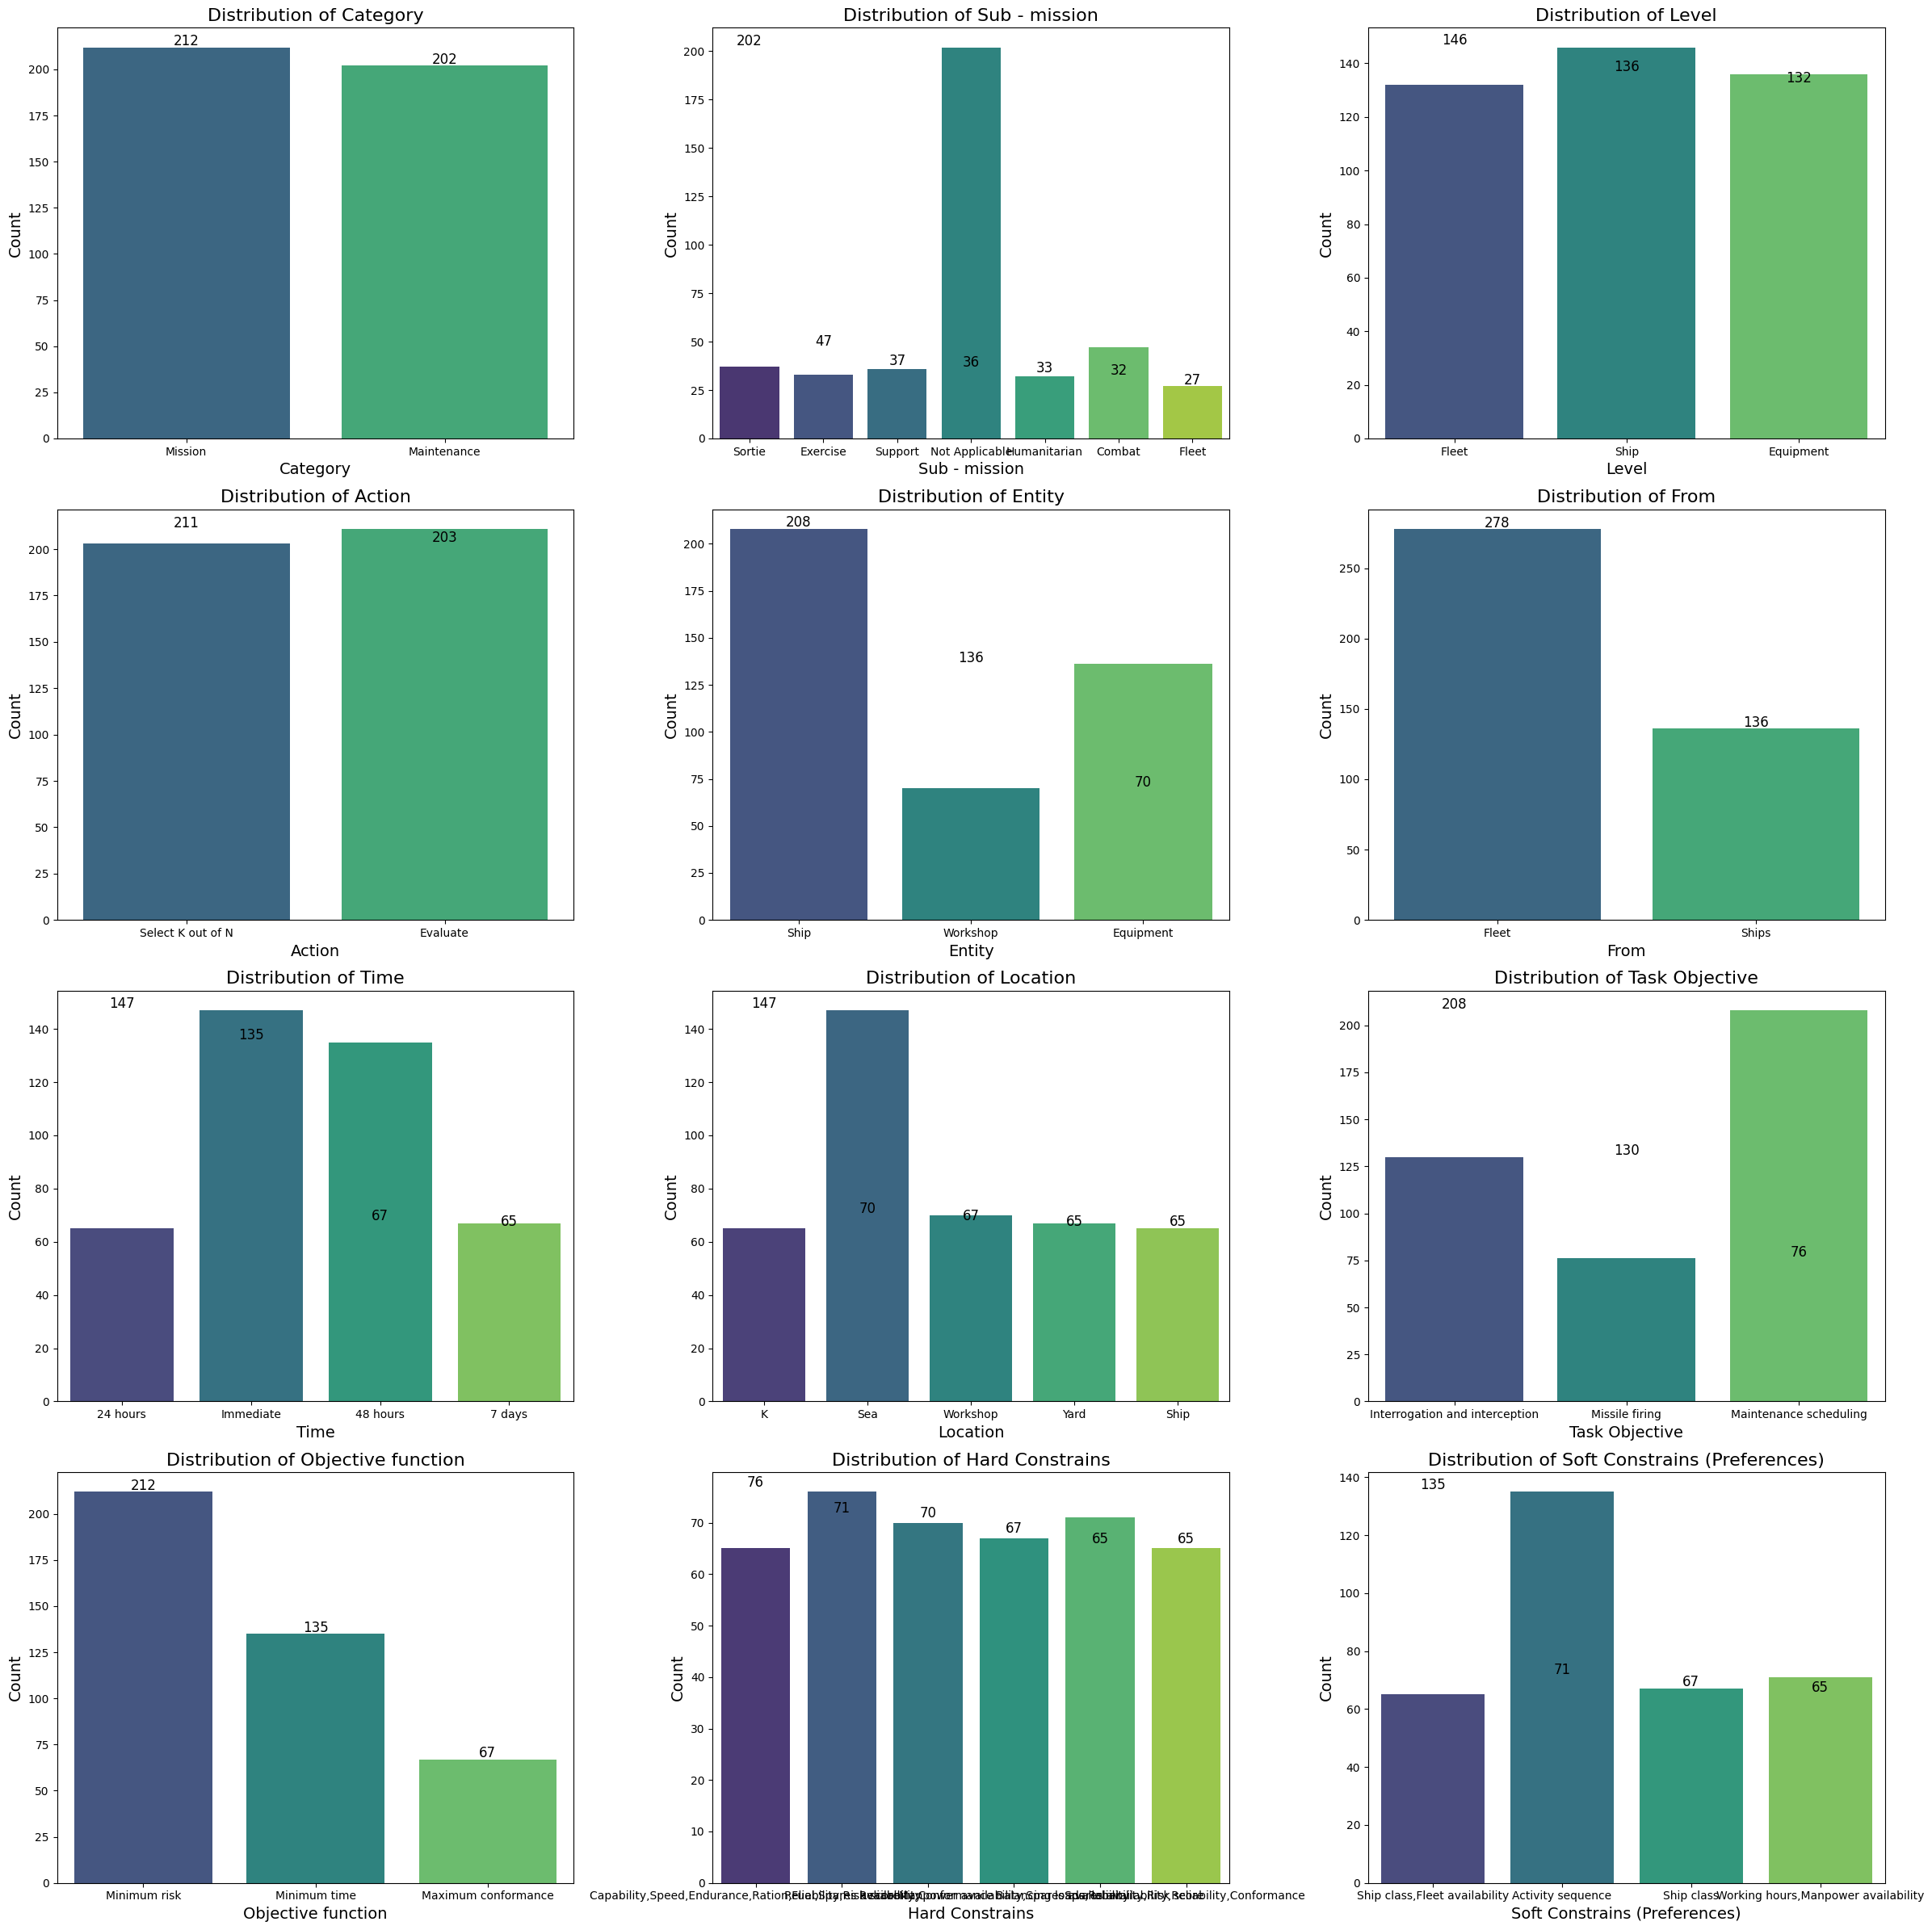

In [20]:
create_count_plots(columns_to_plot[1:], df_test)

In [28]:
df_train = pd.read_csv("./dataset_split_before_generation/train.csv")
df_val = pd.read_csv("./dataset_split_before_generation/val.csv")
df_test = pd.read_csv("./dataset_split_before_generation/test.csv")

df_train = assign_labels_for_submission(df_train)
df_val = assign_labels_for_submission(df_val)
df_test = assign_labels_for_submission(df_test)

/var/folders/yn/bb4yp_pj2p5742vtvn9nw0980000gn/T/ipykernel_37484/1977144274.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Combat', 'Exercise', 'Sortie', 'Humanitarian', 'Fleet', 'Support', 'Combat', 'Exercise', 'Sortie', 'Humanitarian', 'Fleet', 'Support', 'Combat', 'Exercise', 'Sortie', 'Humanitarian', 'Fleet', 'Support', 'Combat', 'Exercise', 'Sortie', 'Humanitarian', 'Fleet', 'Support', 'Combat', 'Exercise', 'Sortie', 'Humanitarian', 'Fleet', 'Support', 'Combat', 'Exercise', 'Sortie', 'Humanitarian', 'Fleet', 'Support', 'Combat', 'Exercise', 'Sortie', 'Humanitarian', 'Fleet', 'Support', 'Combat', 'Exercise', 'Sortie', 'Humanitarian', 'Fleet', 'Support', 'Combat', 'Exercise', 'Sortie', 'Humanitarian', 'Fleet', 'Support', 'Combat', 'Exercise', 'Sortie', 'Humanitarian', 'Fleet', 'Support', 'Combat', 'Exercise', 'Sortie', 'Humanitarian', 'Fleet', 'Support', 'Combat', 'Exercise', 'Sortie', 'Humanitarian', 'F

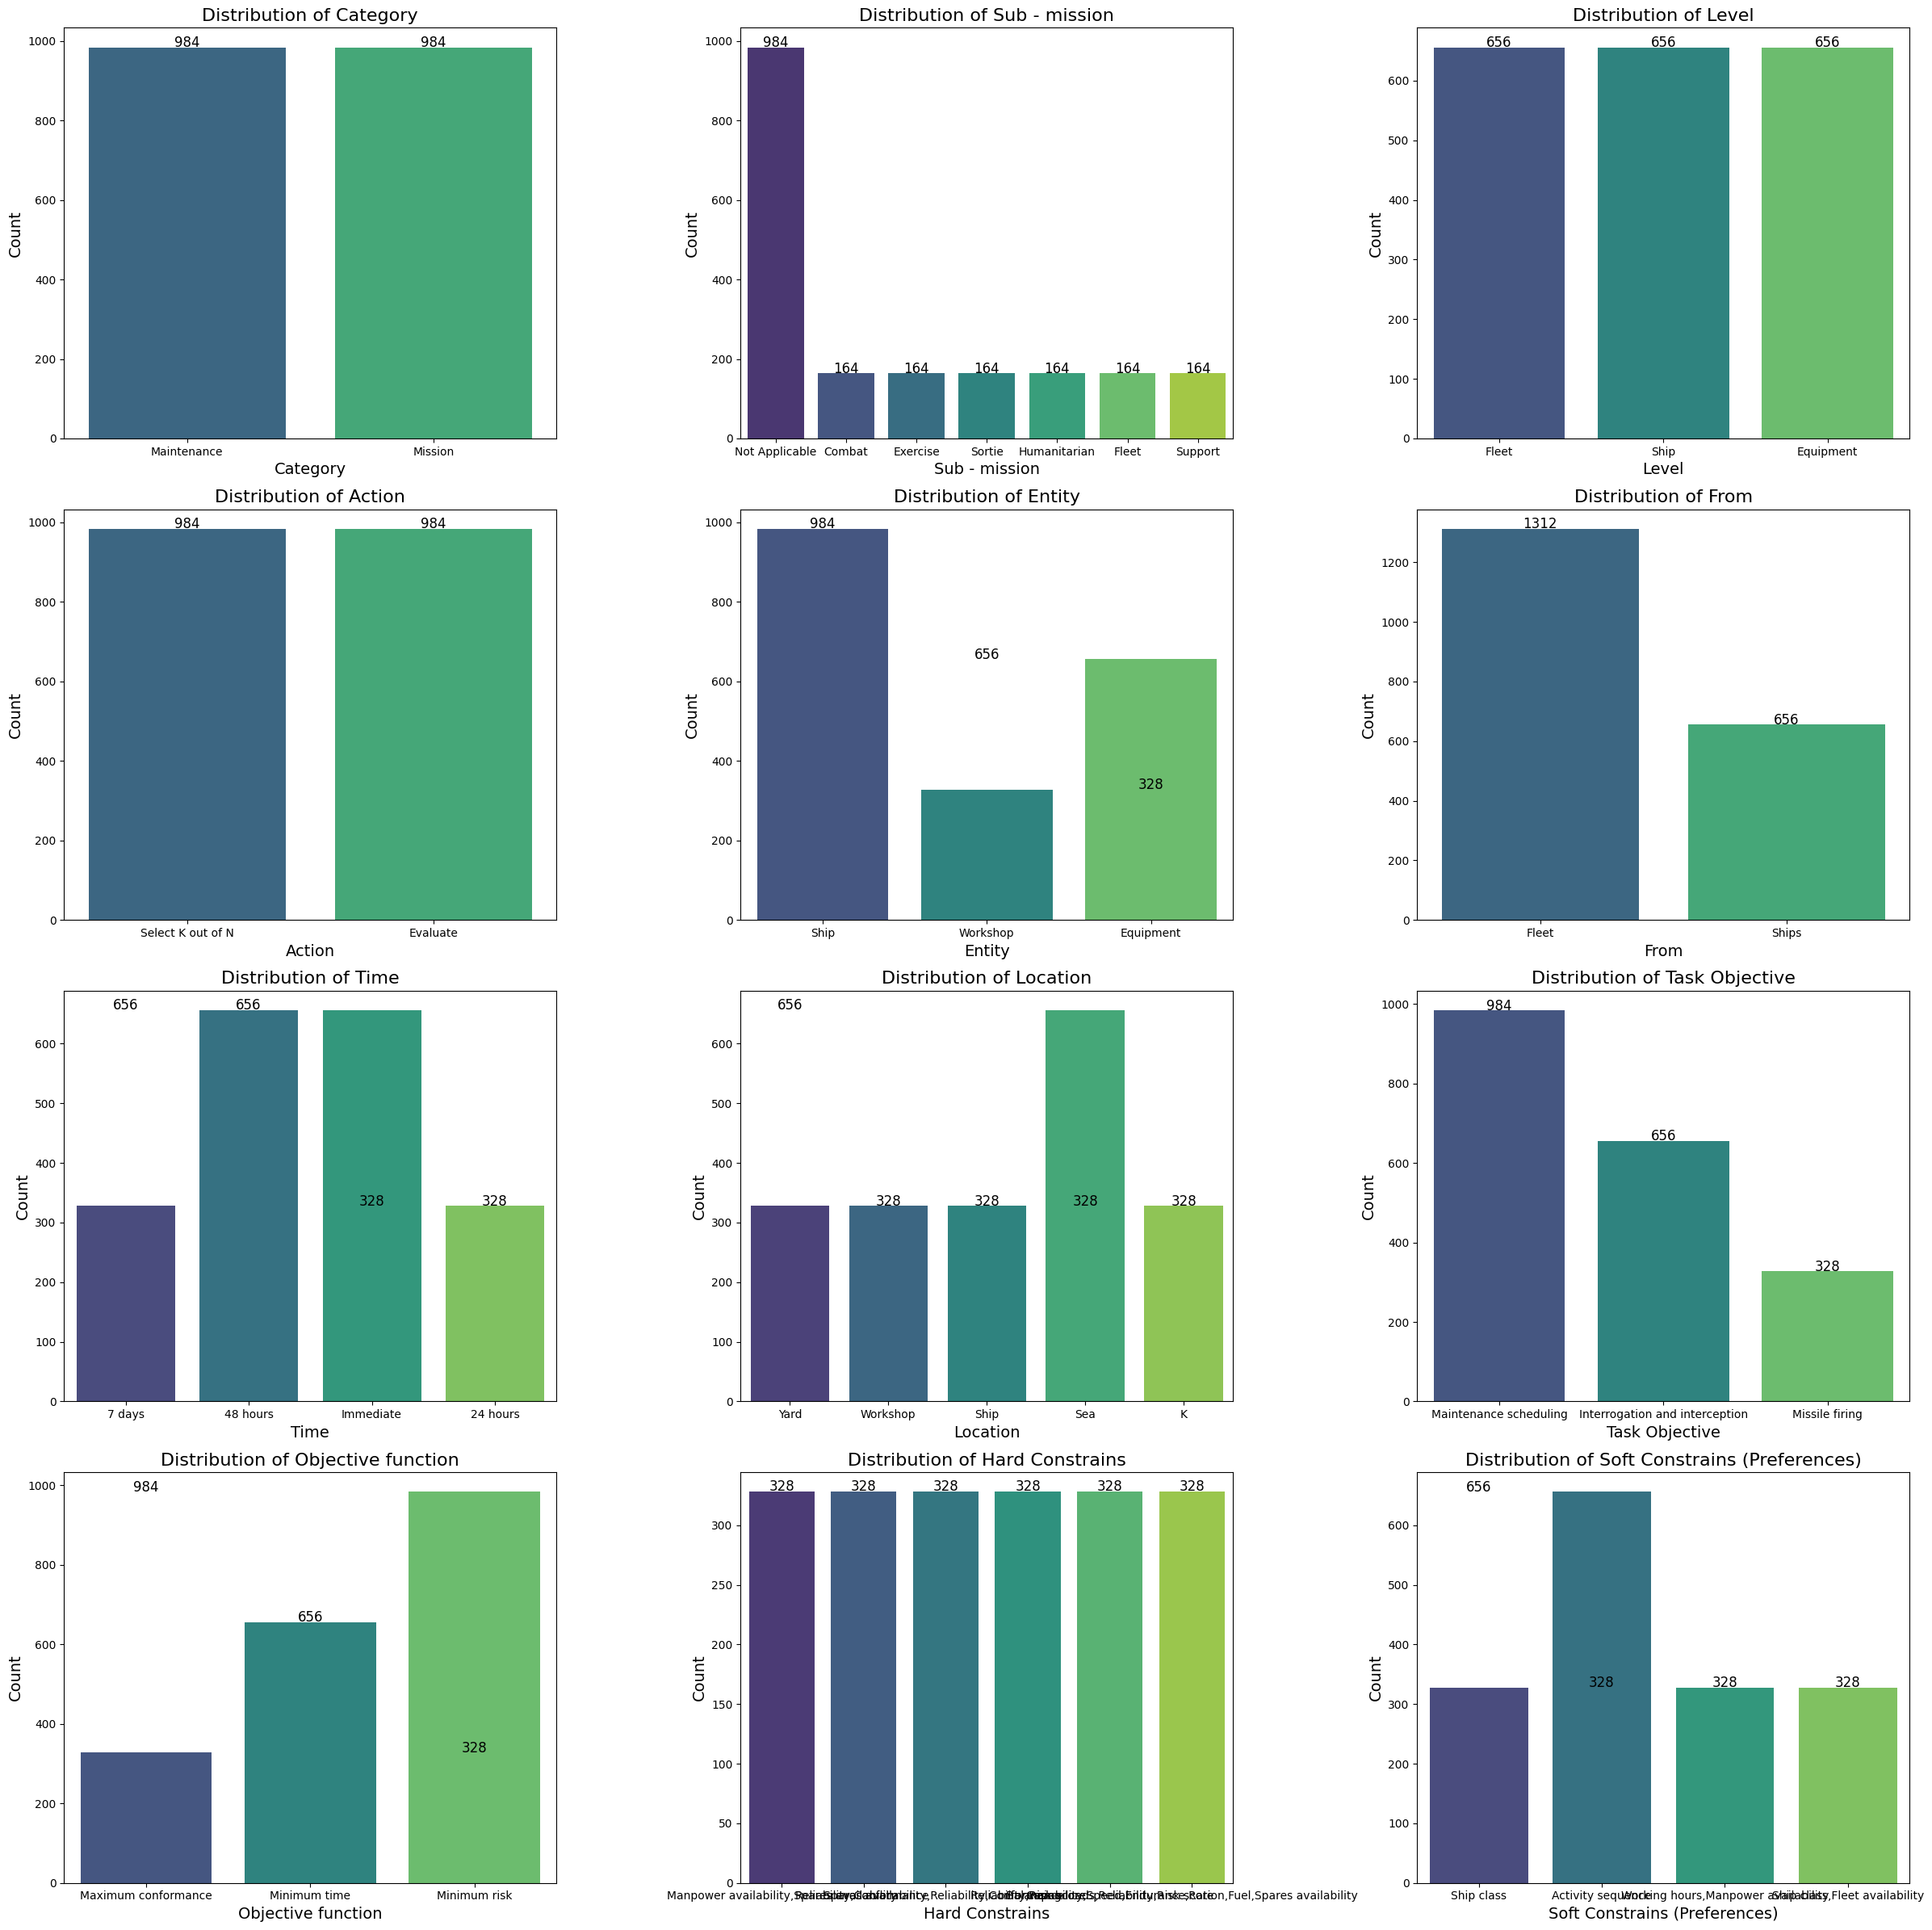

In [29]:
create_count_plots(columns_to_plot[1:], df_train)

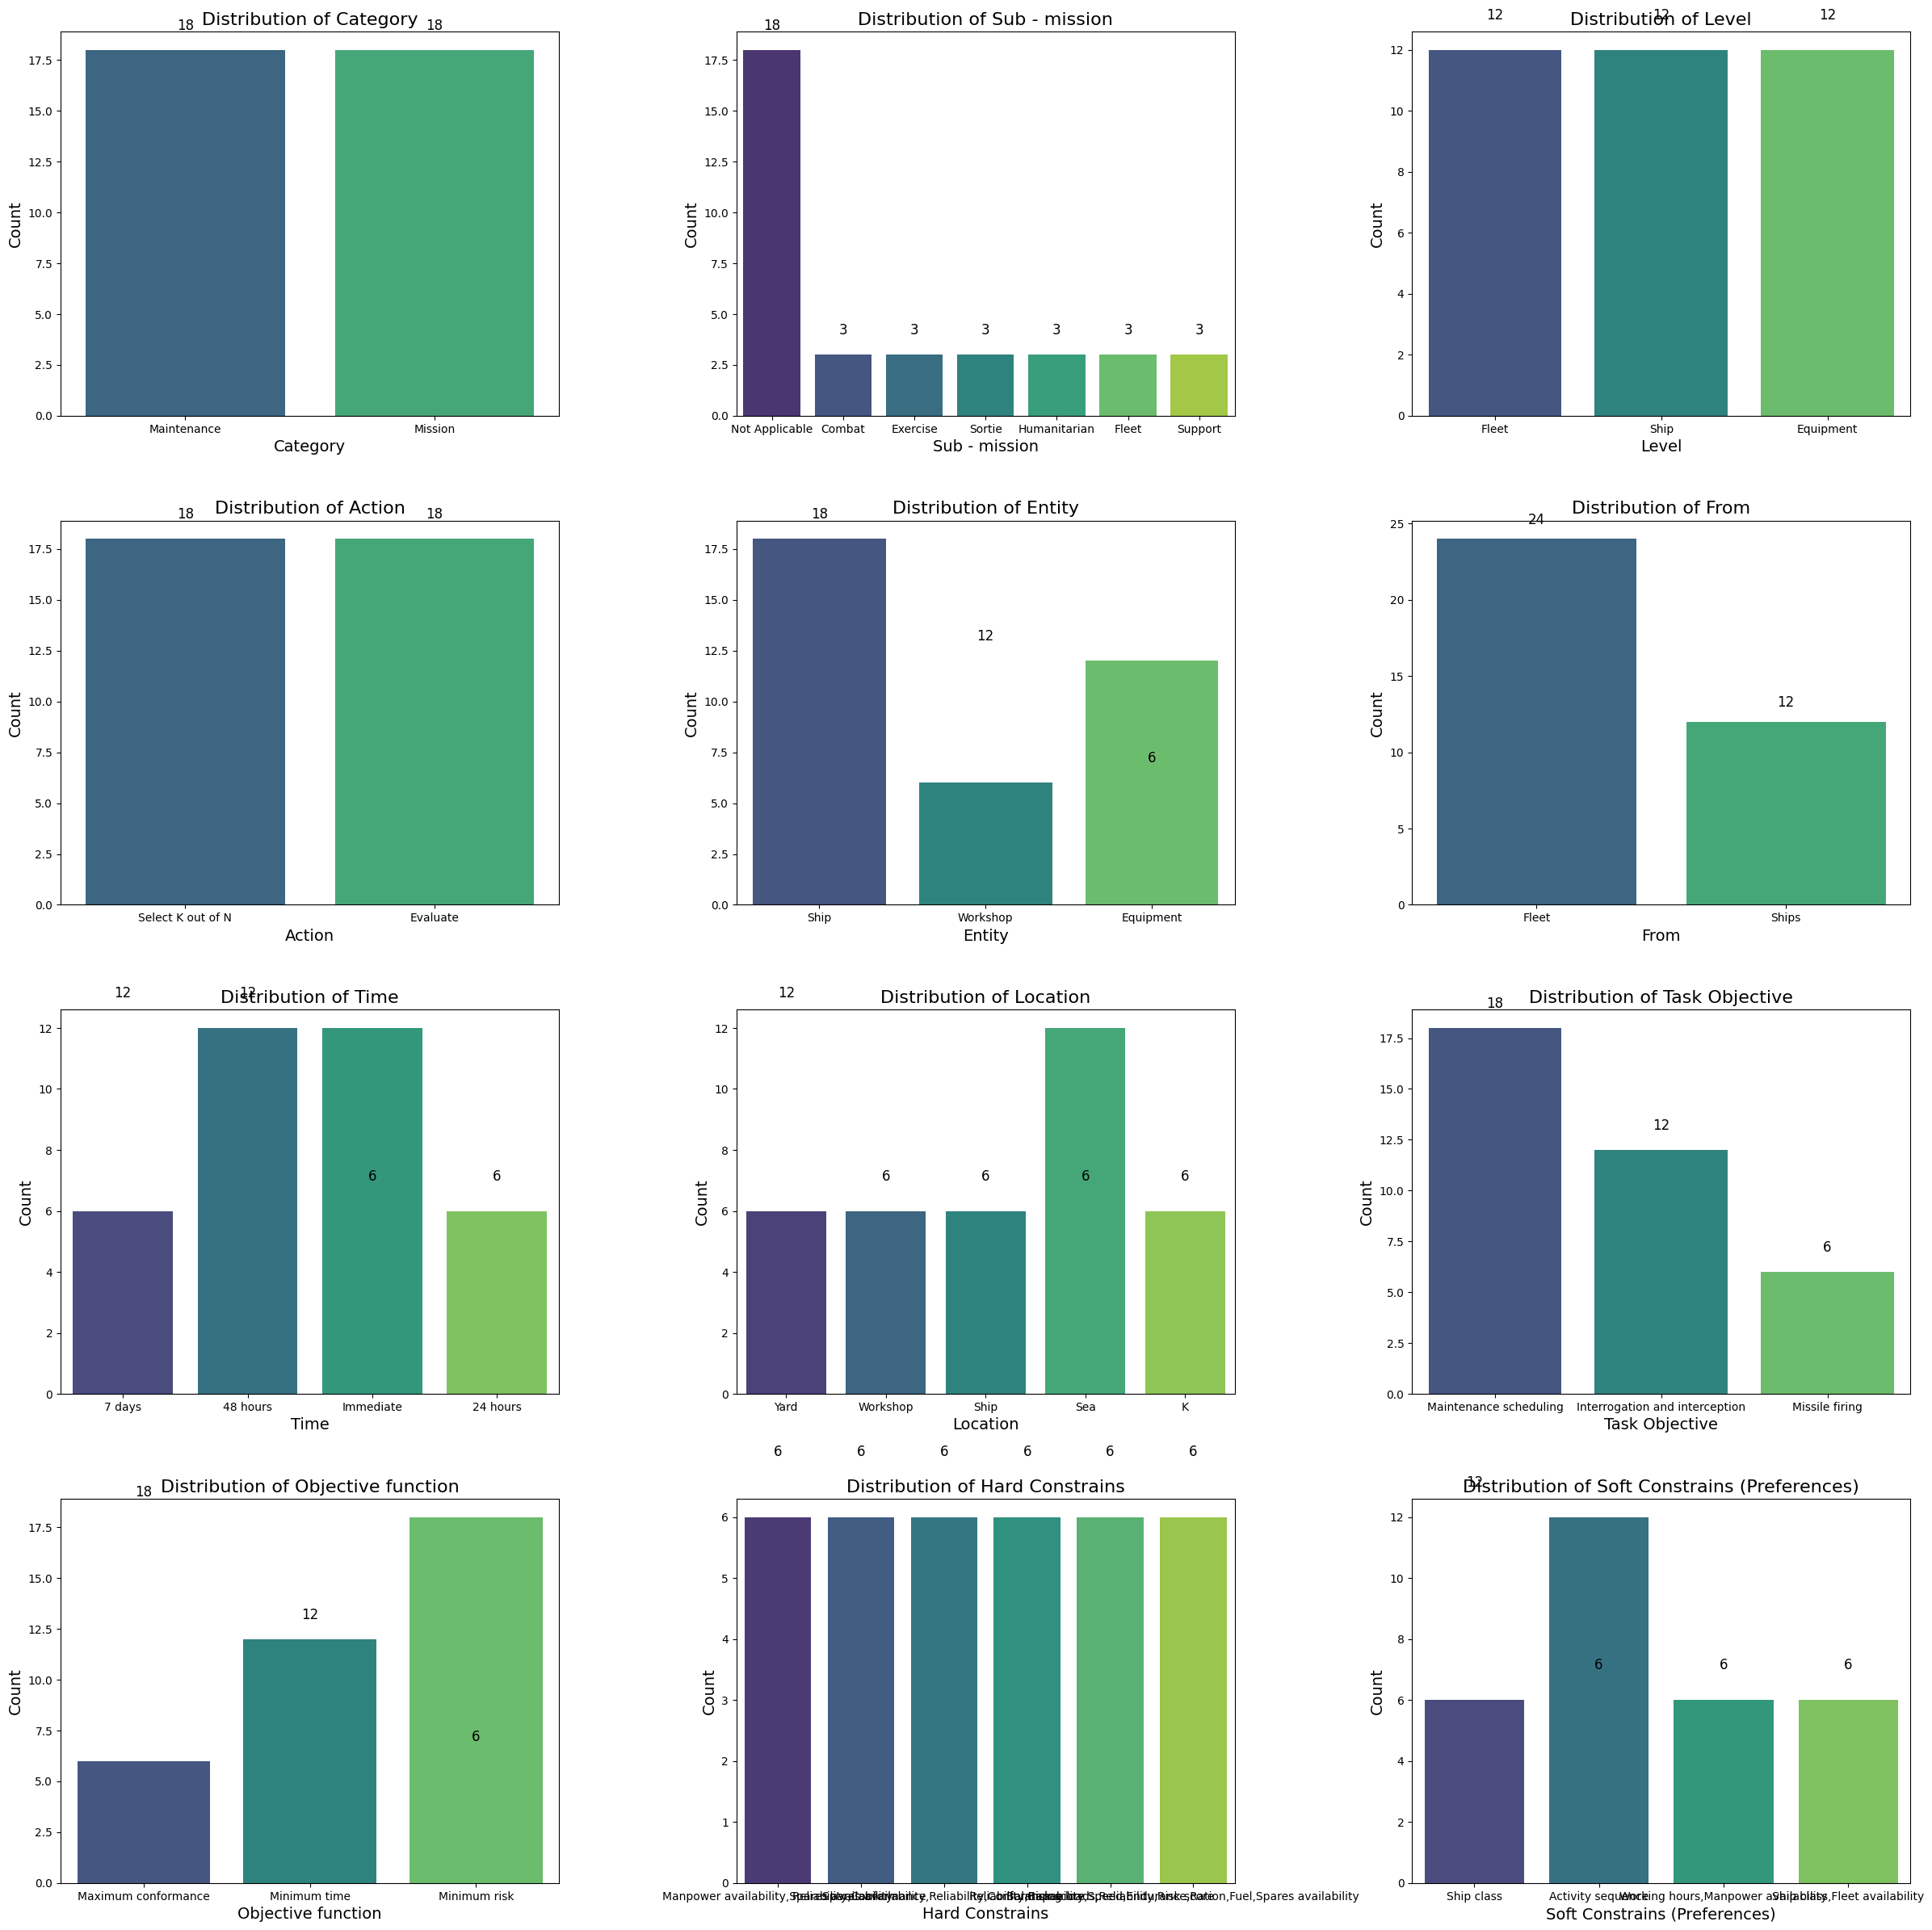

In [30]:
create_count_plots(columns_to_plot[1:], df_val)

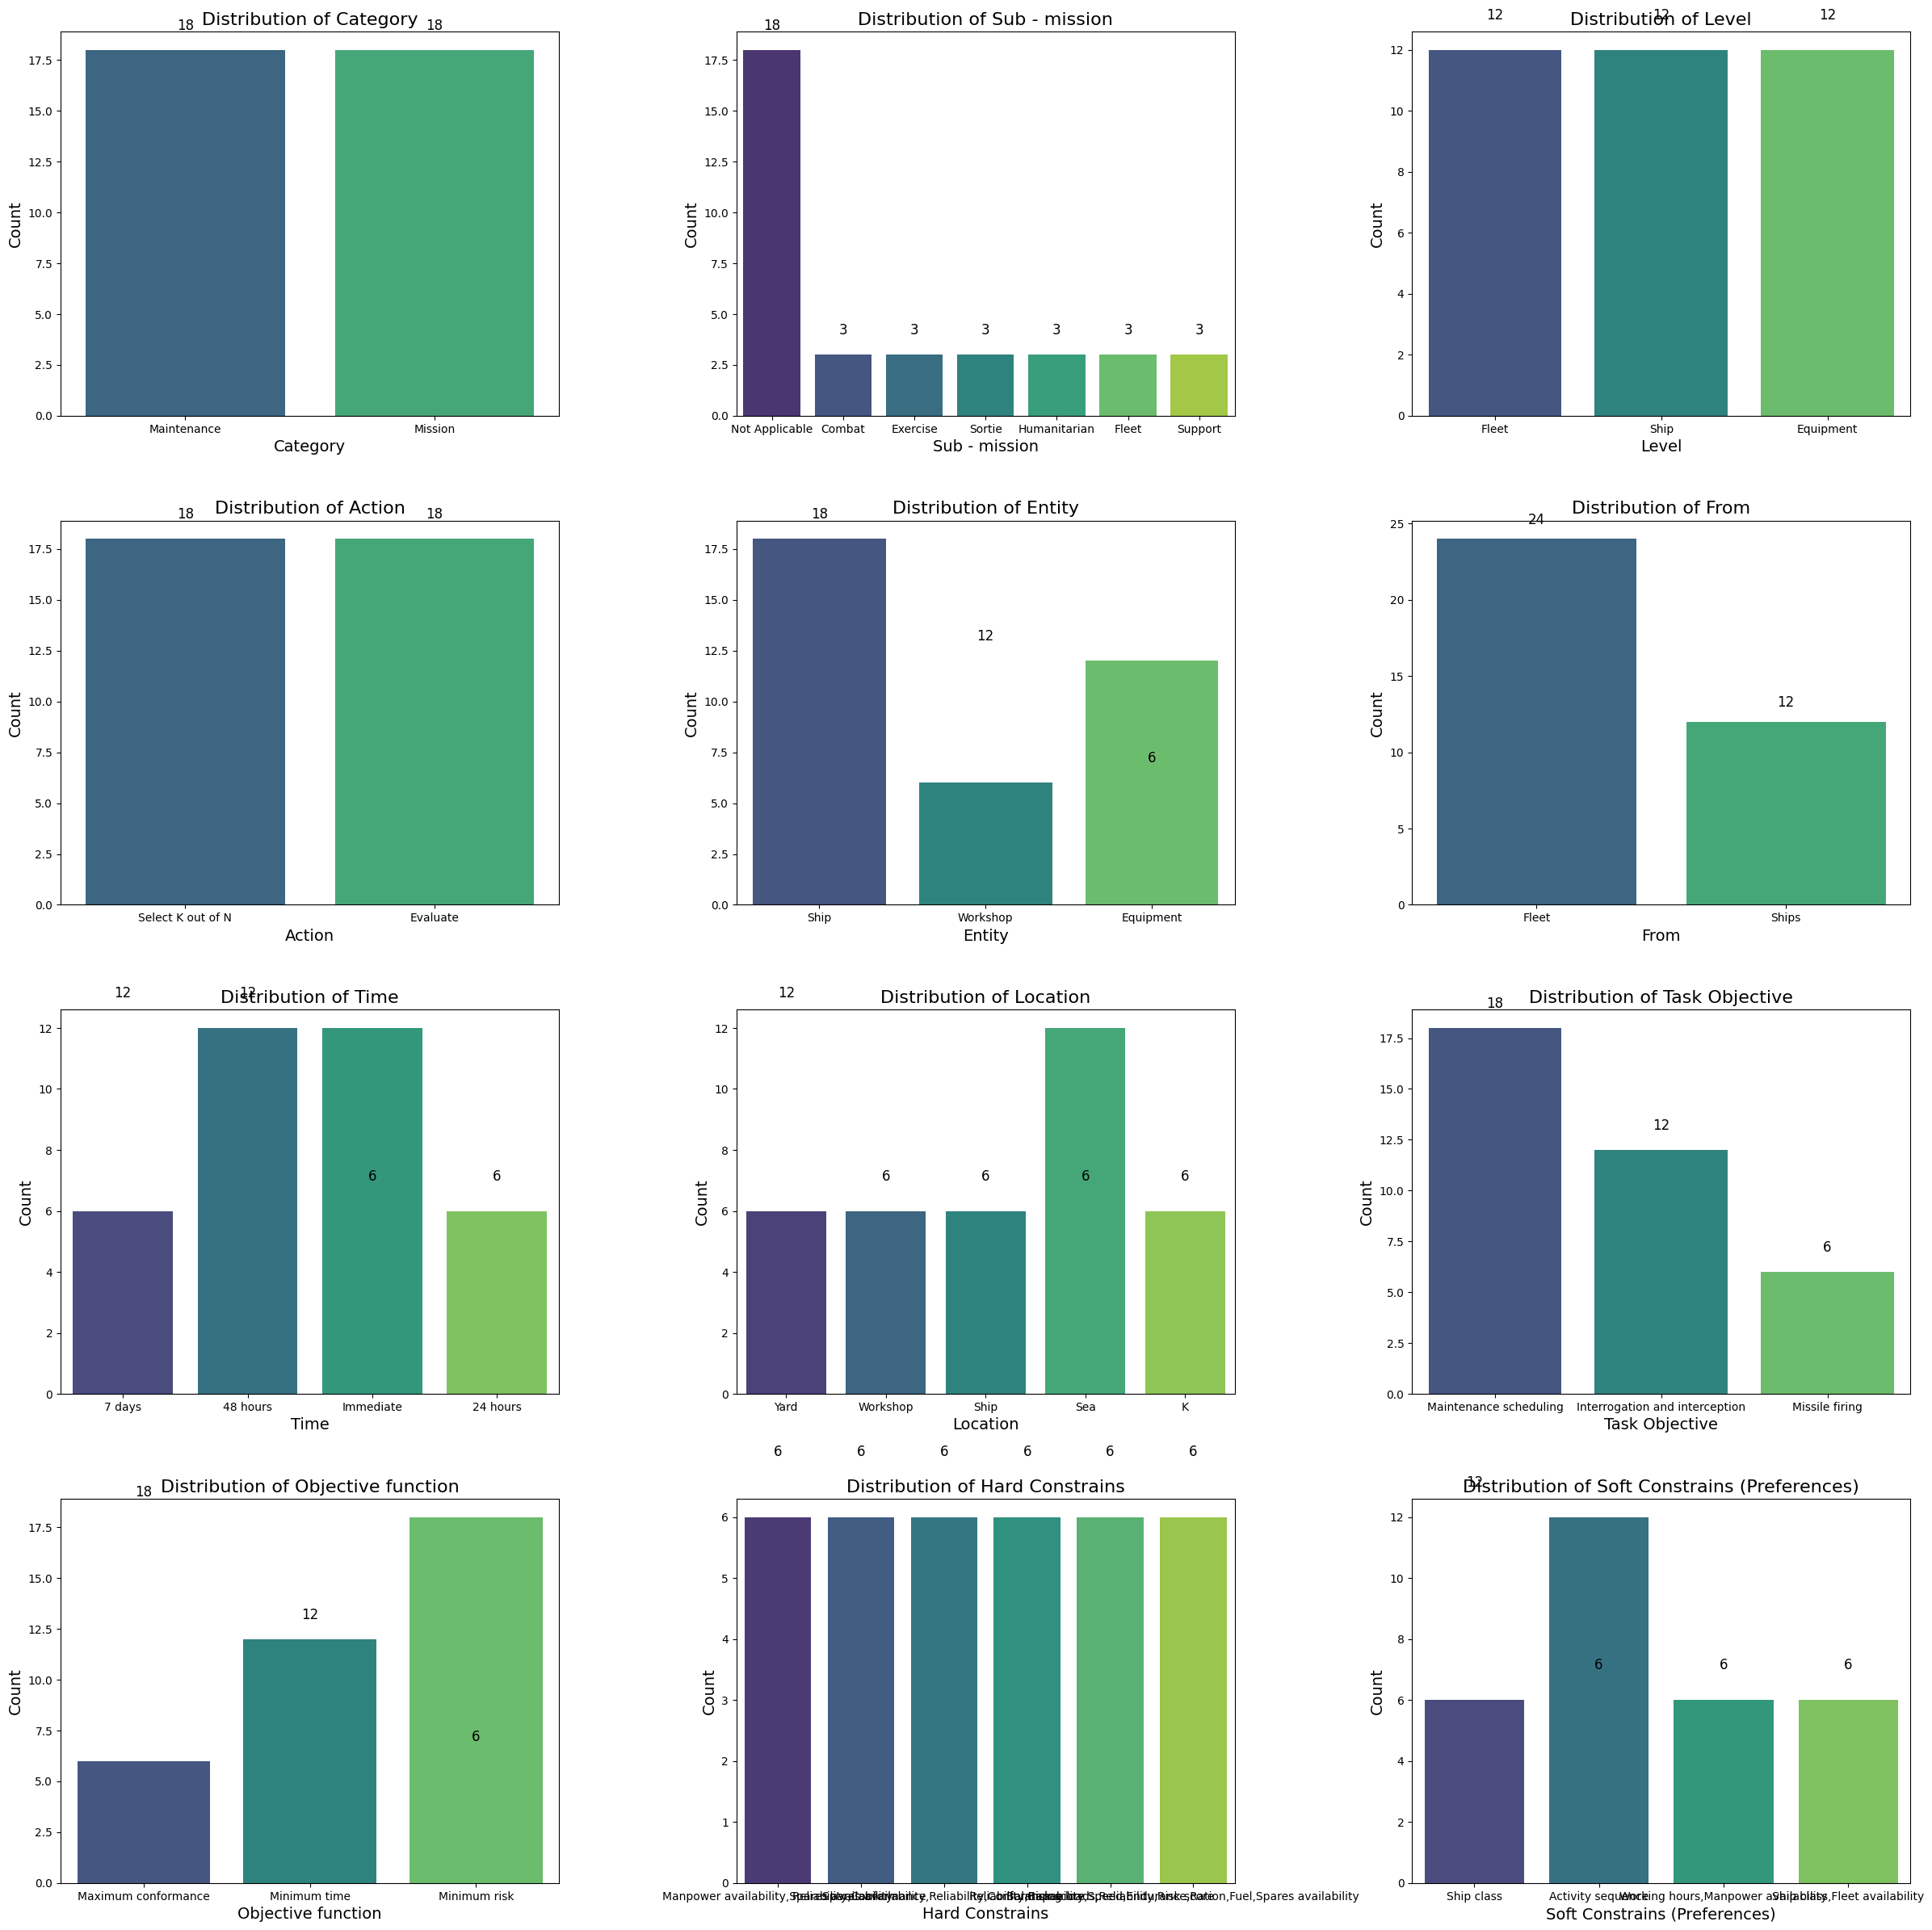

In [31]:
create_count_plots(columns_to_plot[1:], df_test)